<a href="https://colab.research.google.com/github/brunatoloti/data-science-alura-cursos/blob/main/Python%20Scikit-Learn%3A%20Regress%C3%A3o%2C%20Classifica%C3%A7%C3%A3o%20e%20Clustering/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scikit-Learn: Regressão, classificação e clustering

###Importando as bibliotecas

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

###Carregando as bases de dados

Base de dados de diabetes fornecida pelo curso.

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Curso Alura/Python Scikit-Learn: Regressão, classificação e clustering/Dados/diabetes.csv')
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


Base de dados de batimentos cardíacos fornecida pelo curso.

In [ ]:
batimentos = pd.read_csv('/content/drive/MyDrive/Curso Alura/Python Scikit-Learn: Regressão, classificação e clustering/Dados/batimentos cardiacos.csv')
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


Base de dados de colesterol fornecida pelo curso.

In [ ]:
colesterol = pd.read_csv('/content/drive/MyDrive/Curso Alura/Python Scikit-Learn: Regressão, classificação e clustering/Dados/colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


##Classificação

###Separando os dados da base de dados de diabetes em dados de treino e teste

Definindo o x e o y. Feature e label, respectivamente.

In [ ]:
x = diabetes.drop(columns='resultado')   #o que fornecemos ao modelo, features
y = diabetes['resultado']   #o que queremos prever, variável alvo, variável dependente, label

Separando os dados em treino e teste

In [ ]:
SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED)

###Instanciando o objeto e treinando o modelo

**Usando o modelo Decision Tree, no primeiro momento**

Instanciando o objeto

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_arvore = DecisionTreeClassifier(max_depth=3)  #max_depth -> profundidade da arvore

Treinando o modelo

In [ ]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Obtendo a acurácia do modelo

In [ ]:
clf_arvore.score(x_teste, y_teste)

0.7239583333333334

**Usando um Classificador Dummy**

Dessa forma, se o resultado da árvore de decisão for menor que o resultado do Dummy, concluimos que, de fato, usar árvore de decisão nesse caso não é uma boa ideia.

Instanciando o objeto

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
clf_dummy = DummyClassifier(strategy='most_frequent')

Treinando o modelo

In [ ]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Obtendo a acurácia do modelo

In [ ]:
clf_dummy.score(x_teste, y_teste)

0.6770833333333334

Observe que o resultado da acurácia do Classificador Dummy foi menor do que o resultado da acurácia da Árvore de Decisão!

Por mais que a acurácia da Árvore de Decisão não tenha sido tão boa quanto o esperado, pelo menos ela foi maior do que do Classificador Dummy.

Podemos testar com outros classificadores.

##Regressão

Usando a base de dados de batimentos cardíacos, usaremos as colunas *Idade*, *Peso* e *Horas de atividade* para prever os *Batimentos cardíacos*.

Para isso, usaremos o algoritmo de Regressão Linear.

###Visualizando a base de dados de batimentos cardíacos

In [ ]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


###Visualizando graficamente

Usando as colunas *Peso* e *Batimentos cardiacos*

<Figure size 7200x3600 with 0 Axes>

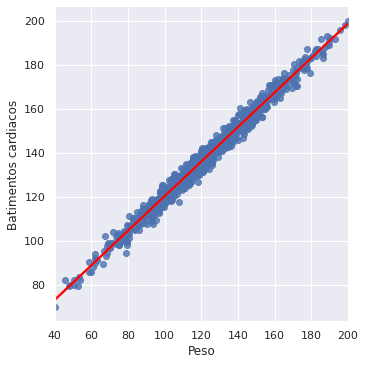

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(100,50))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos, line_kws={'color': 'red'})
plt.show()

###Separando os dados da base de dados de batimentos em dados de treino e teste

Definindo x e y

In [ ]:
x = batimentos[['Peso', 'Idade']]
y = batimentos['Batimentos cardiacos']

Separando os dados em treino e teste

In [ ]:
SEED = 4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED)

###Instanciando o objeto e treinando o modelo

Instanciando o objeto

In [ ]:
from sklearn import linear_model

In [ ]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

Treinando o modelo

In [ ]:
rgs.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

Obtendo a acurácia do modelo

In [ ]:
rgs.score(x_teste, y_teste)

0.9872272899997122

A acurácia está extremamente satisfatória!

##Clustering

Usaremos a base de dados de colesterol.

Para isso, usaremos o algoritmo KMeans.

###Visualizando a base de dados de colesterol

In [ ]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


###Visualizando graficamente

Como essa base de dados possui muitas colunas, veremos a relação entre apenas duas colunas: *pressao_sanguinea_repouso* e *colesterol*.

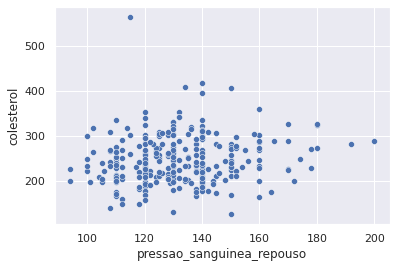

In [ ]:
import seaborn as sns

sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol)

###Instanciando o objeto

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=9)

###Definindo x

Como o clustering é um aprendizado não supervisionado, não declaramos o y, apenas o x.

Verificando as informações do dataframe de colesterol. (O KMeans não entende strings, portanto, precisamos verificar se na base de dados possuimos alguma coluna que possui strings).

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

Observe que temos duas colunas do tipo *object*, portanto, possuem strings.

Optando então por pegarmos apenas as colunas que são do tipo *int64* como sendo o x.

In [ ]:
x = colesterol.select_dtypes('int64')

###Treinando o algoritmo

In [ ]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

###Verificando as separações

In [ ]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

Visualizando graficamente a relação entre as colunas  *pressao_sanguinea_repouso* e *colesterol*, verificando a separação feita.

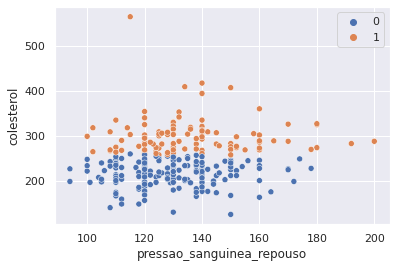

In [ ]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol, hue=kmeans.labels_)

###Obtendo a média do colesterol de cada grupo criado

Para isso, criaremos uma coluna de clusters

In [ ]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,0


In [ ]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64

Observe que a média de colesterol das pessoas do cluster/grupo 0 é 216 e a média de colesterol das pessoas do cluster/grupo 1 é 298.